In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
data = pd.read_csv("spam_ham_dataset.csv")
print(data.shape)
data.head()

(5171, 4)


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [4]:
data=data.drop(['Unnamed: 0'],axis=1)
data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
print(data.label_num.value_counts())

0    3672
1    1499
Name: label_num, dtype: int64


In [6]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download("stopwords")
stop_words=set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
text_list = []                            
for text in data.text:
  text = text.lower()
  tokens = nltk.word_tokenize(text)
  filtered_text = [text for text in tokens if text not in stop_words]
  ps = nltk.PorterStemmer()
  stemmed_text = [ps.stem(text) for text in filtered_text]
  lemma = nltk.WordNetLemmatizer()
  lemmatized_text =[lemma.lemmatize(text,pos='a') for text in stemmed_text]
  text_list.append(" ".join(lemmatized_text))

In [8]:
max_features = 1500               
cv = CountVectorizer(max_features=max_features)

x = cv.fit_transform(text_list).toarray()
y = data['label_num']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 40)

In [10]:
lr = LogisticRegression(max_iter = 300)
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

In [11]:
accuracy = 100.0 * accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  98.45559845559846


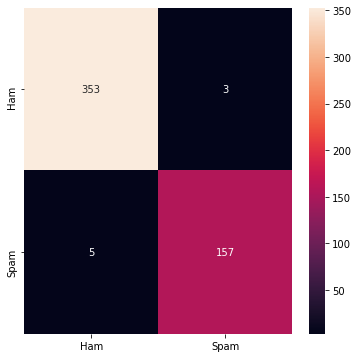

In [12]:
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))
sns.heatmap(mat, annot = True, fmt="d", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam']);